# Hands-on-data #2

The goal of this assignment is for you to practice simple visualizations applied to educational data. You can create those visualizations with Excel or any other software of your choice.

When submitting the assignment, submit a text document that includes your visualizations as well as explanations for your answers.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

import ho2


## Question 1 (1.5 point)

Draw scatterplots and heatmap for the datasets named [Assignment-2-Scatterplot1.csv](./data/Assignment-2-Scatterplot-1.csv) and [Assignment-2-Scatterplot-2.csv](./data/Assignment-2-Scatterplot-2.csv). In both cases, give a quick description of the distribution of the data points and explain which visualization (scatterplot or heat map) is most appropriate.

In [3]:
scatter1 = pd.read_csv('./data/Assignment-2-Scatterplot-1.csv')
scatter2 = pd.read_csv('./data/Assignment-2-Scatterplot-2.csv')

(None, None)

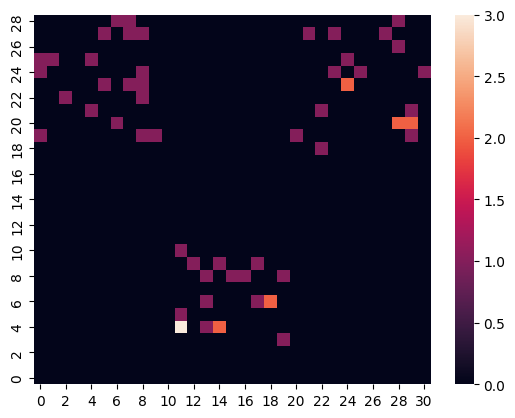

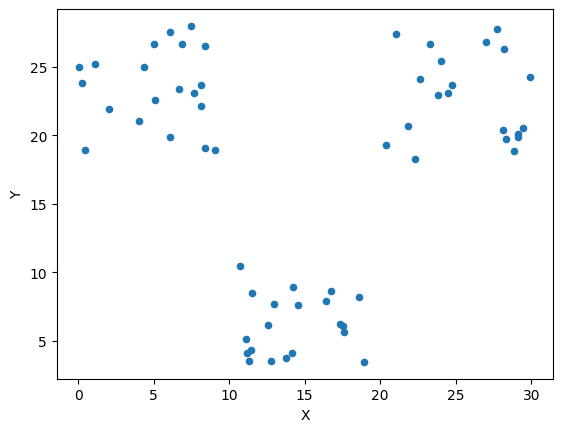

In [4]:
ho2.plot_heatmap(scatter1), ho2.plot_scatter(scatter1)

For `scatterplot-1`, we can see that points are clustered in 3 regions.
There isn't a lot of overlap for each data point, so a scatterplot is appropriate

(None, None)

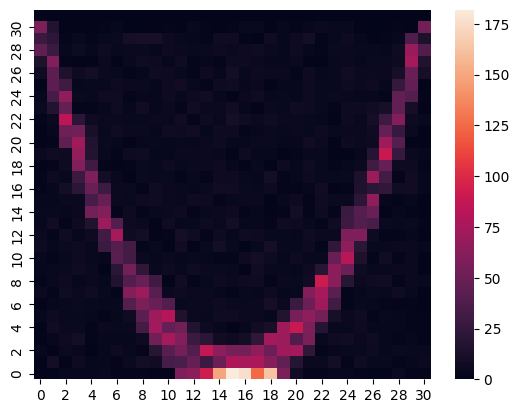

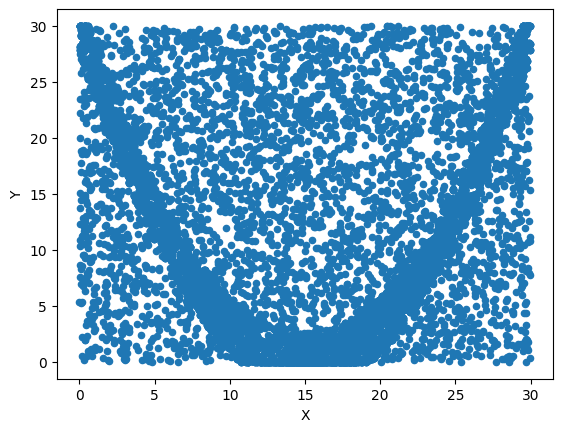

In [5]:
ho2.plot_heatmap(scatter2), ho2.plot_scatter(scatter2)

For `scatterplot-2`, many of the datapoints overlap.
The heatmap is the more appropriate visualization method, as in it we can better observe that the points are concentrated around the contour of a parabola.

## Question 2 (1.5 point)

Using the dataset named [ASSISTments-sample.csv](./data/ASSISTments-sample.csv), draw the learning curves for the skills named “Box and Whisker” and “Inverse Relation”. Provide a short description/analysis of each curve.

In [26]:
assistment = pd.read_csv('./data/ASSISTments-sample.csv')
assistment[assistment['user_id']==52451]

,skill,problem_id,user_id,assignment_id,assistment_id,start_time,end_time,problem_type,original,correct,hint_count
0,Box and Whisker,36843,52451,175321,27833,44:28.0,47:00.5,algebra,1,0,0
1,Box and Whisker,36843,52451,175322,27833,50:35.1,50:51.8,algebra,1,1,0
2,Inverse Relations,8718,52451,175315,8718,28:11.1,29:20.4,choose_1,1,0,0
3,Inverse Relations,833,52451,175315,833,29:22.0,29:39.9,choose_1,1,0,0
4,Inverse Relations,882,52451,175315,882,30:21.4,30:55.6,choose_1,1,0,0
5,Inverse Relations,2213,52451,175315,2213,31:08.1,31:43.6,choose_1,1,1,0
6,Inverse Relations,4535,52451,175315,4535,31:44.9,31:57.6,choose_1,1,1,0
7,Box and Whisker,51450,52451,218156,33165,22:27.2,22:35.5,algebra,1,1,0
8,Box and Whisker,51435,52451,218156,33150,22:37.4,22:51.5,algebra,1,1,0


We assume that the assignments follow each other chronologically (e.g. assignment 2 comes after assignment 1).

We will use

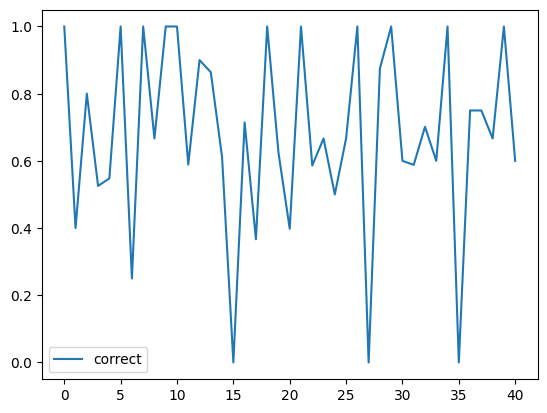

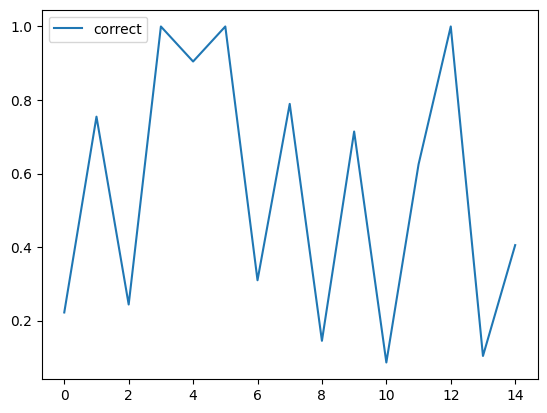

In [71]:
def plot_skill(df: pd.DataFrame, skill: str) -> pd.DataFrame:
        d=df.groupby(['skill', 'assignment_id']).mean(numeric_only=True).reset_index().drop(columns=['problem_id', 'user_id', 'assistment_id', 'original', 'hint_count'])
        d=d[d['skill'] == skill].set_index('assignment_id').drop(columns=['skill'])
        d['correct'] = 1 - d['correct']
        d.reset_index().plot(y='correct')
plot_skill(assistment, 'Inverse Relations')
plot_skill(assistment, 'Box and Whisker')

## Question 3 (2 point)

Create a visualization using either the [ASSISTments](./data/ASSISTments-sample.csv) (this can include the features created during Weeks 2-3) or the [Cognitive Tutor](./data/CognitiveTutorAlgebra-gaming-clips.csv) (this can include the features created in Assignment 1) datasets. You are not limited to visualization types seen in class. Feel free to use other types of visualization (for example histograms or pie charts). Explain the goal behind the visualization (what information are you trying to convey) as well as a quick analysis of the result of applying this visualization to the dataset.